In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# loading dataset
data = pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv");
print(data.shape);
print(data.head());

(22424, 3)
  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [3]:
# function to read image
def readimage(path):
    img = tf.keras.utils.load_img(path,color_mode = "rgb");
    img = tf.keras.utils.img_to_array(img);
    return img/255;

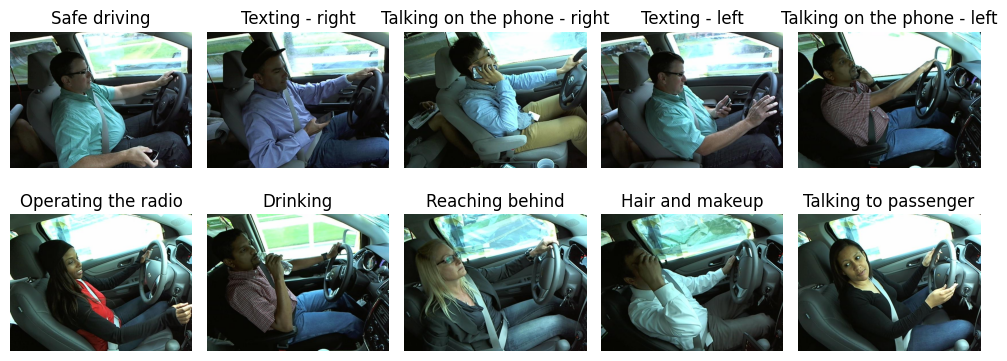

In [4]:
# plotting training images
from matplotlib import pyplot as plt
baseurl = "/kaggle/input/state-farm-distracted-driver-detection/imgs/train/";
activitymap = {'c0' : 'Safe driving','c1': 'Texting - right','c2': 'Talking on the phone - right', 
'c3': 'Texting - left','c4': 'Talking on the phone - left','c5': 'Operating the radio',
'c6': 'Drinking','c7': 'Reaching behind','c8': 'Hair and makeup','c9': 'Talking to passenger'};
fig = plt.figure(figsize = (10,4));
for i,directory in enumerate(sorted(activitymap.keys())):
    imagefile = os.listdir(os.path.join(baseurl,directory))[0];
    imagepath = os.path.join(baseurl,directory,imagefile);
    image = readimage(imagepath);
    ax = fig.add_subplot(2,5,i + 1);
    ax.imshow(image);
    ax.set_title(activitymap[directory]);
    ax.axis("off");
plt.tight_layout();

In [5]:
# importing libraries and setting up neural network model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model = Sequential();

In [6]:
# adding layers to neural network model
model.add(Conv2D(128,(3,3),activation = "relu",input_shape = (240,240,3),
data_format = "channels_last"));
model.add(MaxPooling2D((2,2)));
model.add(Conv2D(64,(3,3),activation = "relu"));
model.add(MaxPooling2D((2,2)));
model.add(Conv2D(32,(3,3),activation = "relu"));
model.add(MaxPooling2D((2,2)));
model.add(Flatten());
model.add(Dense(1024,activation = "relu"));
model.add(Dropout(0.2));
model.add(Dense(1024,activation = "relu"));
model.add(Dropout(0.2));
model.add(Dense(256,activation = "relu"));
model.add(Dropout(0.2));
model.add(Dense(10,activation = "softmax"));

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compiling the model
model.compile(optimizer = "adam",loss = "categorical_crossentropy",
metrics = ["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.AUC()]);

In [8]:
# Import ImageDataGenerator and define paths, generators for training, validation, and test sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/kaggle/input/state-farm-distracted-driver-detection/imgs/train";
test_dir = "/kaggle/input/state-farm-distracted-driver-detection/imgs/";
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.2);
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size = (240,240),class_mode = "categorical",batch_size = 32,
    subset = "training"
);
validation_generator = train_datagen.flow_from_directory(
    train_dir,target_size = (240,240),class_mode = "categorical",batch_size = 32,
    subset = "validation"
);
test_datagen = ImageDataGenerator(rescale = 1.0/255);
test_generator = test_datagen.flow_from_directory(
     test_dir,target_size = (240,240),classes = ["test"],class_mode = None,batch_size = 32,shuffle = False
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [9]:
# using earlystopping
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = "val_accuracy",patience = 5,min_delta = 0.005,
                              restore_best_weights = True);

In [10]:
# fitting the model
history = model.fit(train_generator,epochs = 10,validation_data = validation_generator,callbacks = [earlystopping],verbose = 2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 - 347s - 618ms/step - accuracy: 0.3872 - auc: 0.8175 - loss: 1.6514 - precision: 0.7688 - recall: 0.2294 - val_accuracy: 0.7353 - val_auc: 0.9687 - val_loss: 0.7484 - val_precision: 0.8307 - val_recall: 0.6340
Epoch 2/10
561/561 - 299s - 534ms/step - accuracy: 0.8355 - auc: 0.9831 - loss: 0.5035 - precision: 0.8887 - recall: 0.7889 - val_accuracy: 0.9105 - val_auc: 0.9930 - val_loss: 0.2839 - val_precision: 0.9317 - val_recall: 0.8924
Epoch 3/10
561/561 - 291s - 518ms/step - accuracy: 0.9180 - auc: 0.9933 - loss: 0.2695 - precision: 0.9362 - recall: 0.9008 - val_accuracy: 0.9306 - val_auc: 0.9956 - val_loss: 0.2309 - val_precision: 0.9446 - val_recall: 0.9127
Epoch 4/10
561/561 - 291s - 519ms/step - accuracy: 0.9395 - auc: 0.9955 - loss: 0.2013 - precision: 0.9512 - recall: 0.9264 - val_accuracy: 0.9493 - val_auc: 0.9970 - val_loss: 0.1639 - val_precision: 0.9575 - val_recall: 0.9409
Epoch 5/10
561/561 - 291s - 519ms/step - accuracy: 0.9510 - auc: 0.9964 - loss: 0.1666 - precis

In [11]:
# evaluating the model on validation data
print(model.evaluate(validation_generator));

141/141 ━━━━━━━━━━━━━━━━━━━━ 58s 411ms/step - accuracy: 0.9747 - auc: 0.9986 - loss: 0.0950 - precision: 0.9786 - recall: 0.9724
[0.08912034332752228, 0.9752287268638611, 0.9788906574249268, 0.9727739095687866, 0.9984093904495239]


In [12]:
# printing model summary
print(model.summary());

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 238, 238, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 119, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 117, 117, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,304,640 (310.15 MB)

 Trainable params: 27,101,546 (103.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,203,094 (206.77 MB)

None


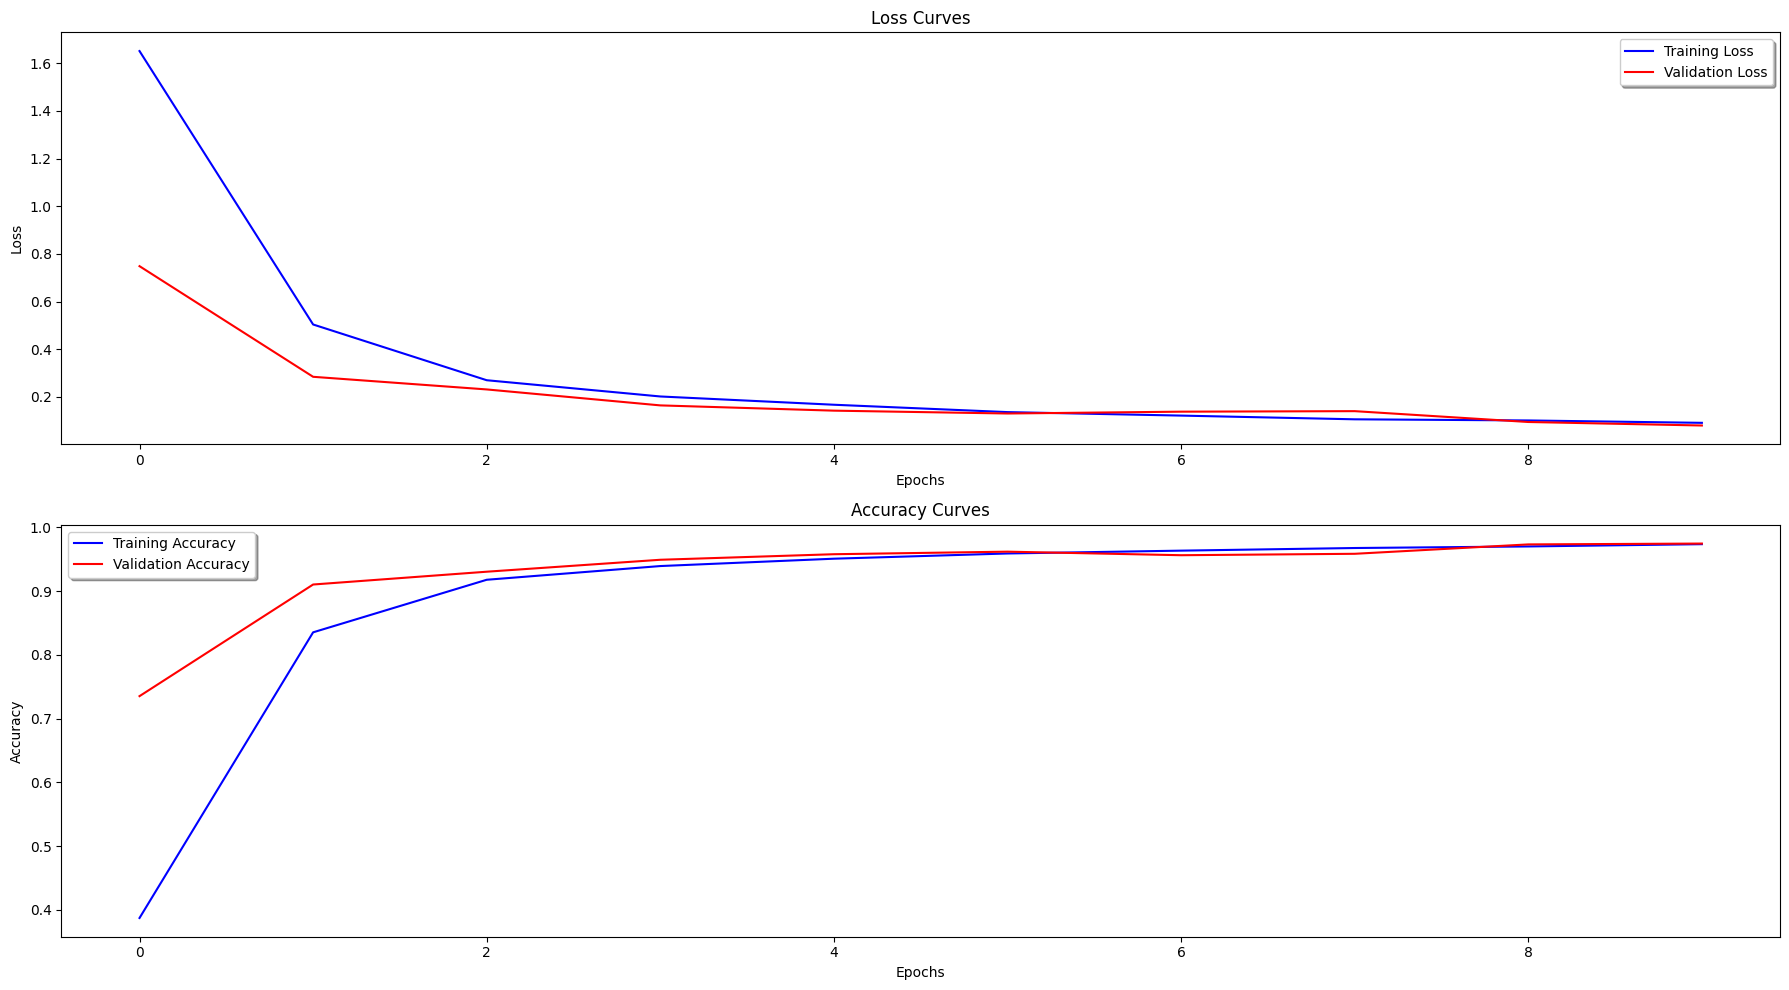

In [14]:
# plotting accuracy and loss curves 
from matplotlib import pyplot as plt
fig,ax = plt.subplots(2,1,figsize = (18,10));
ax[0].plot(history.history["loss"],color = "b",label = "Training Loss");
ax[0].plot(history.history["val_loss"],color = "r",label = "Validation Loss");
ax[0].set_xlabel("Epochs");
ax[0].set_ylabel("Loss");
ax[0].set_title("Loss Curves");
ax[0].legend(loc = "best",shadow = True);
ax[1].plot(history.history["accuracy"],color = "b",label = "Training Accuracy");
ax[1].plot(history.history["val_accuracy"],color = "r",label = "Validation Accuracy");
ax[1].set_xlabel("Epochs");
ax[1].set_ylabel("Accuracy");
ax[1].set_title("Accuracy Curves");
ax[1].legend(loc = "best",shadow = True);
plt.tight_layout();

In [26]:
# predicting using test data
ypred = model.predict(test_generator);
print(ypred.shape);

2492/2492 ━━━━━━━━━━━━━━━━━━━━ 313s 125ms/step
(79726, 10)


In [29]:
# processing for submission
filenames = test_generator.filenames
imageids = [f.split("/")[-1] for f in filenames];

In [32]:
# processing for submission
df = pd.DataFrame(ypred,columns = [f"c{i}" for i in range(10)])
df.insert(0,"img",imageids);

In [33]:
# Creating Results.csv
df.to_csv("Results.csv",index = False);

In [40]:
# generating validation data 
validation_generator = train_datagen.flow_from_directory(
    train_dir,target_size = (240,240),class_mode = "categorical",batch_size = 32,
    subset = "validation",shuffle = False
);

Found 4481 images belonging to 10 classes.


In [41]:
# changing ypred and ytest to normal form
ypred = model.predict(validation_generator);
ypred = np.argmax(ypred,axis = 1);
ytest = validation_generator.classes;
print(ypred.shape,ytest.shape);

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 57s 407ms/step
(4481,) (4481,)


In [44]:
# printing accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score = accuracy_score(ytest,ypred);
print(score);

0.9750055791118054


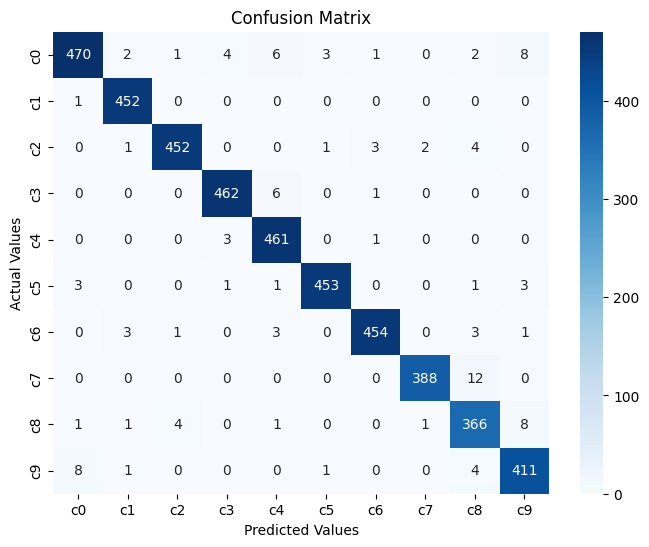

In [48]:
# printing confusion matrix
import seaborn as sns 
from matplotlib import pyplot as plt
arr = [f"c{i}" for i in range(10)];
plt.figure(figsize = (8,6));
cm = confusion_matrix(ytest,ypred);
sns.heatmap(cm,cmap = "Blues",fmt = "d",annot = True,xticklabels = arr,yticklabels = arr);
plt.xlabel("Predicted Values");
plt.ylabel("Actual Values");
plt.title("Confusion Matrix");

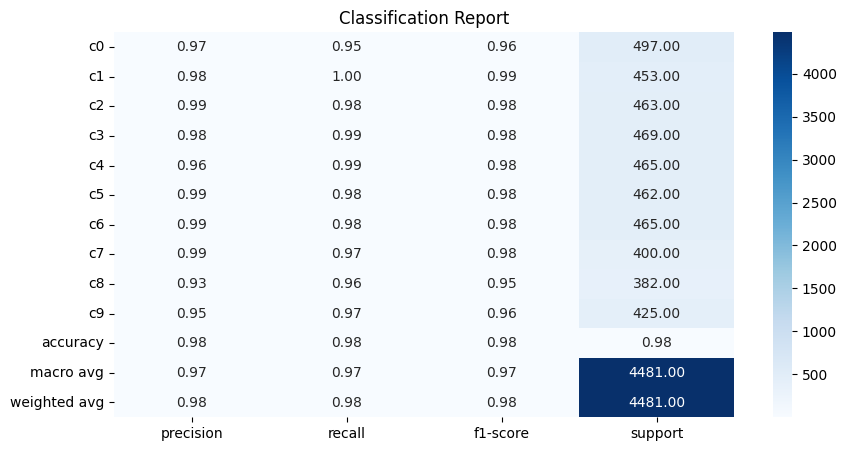

In [49]:
# printing classification report
report = classification_report(ytest,ypred,output_dict = True,target_names = arr);
df = pd.DataFrame(report).transpose();
plt.figure(figsize = (10,5));
sns.heatmap(df,cmap = "Blues",fmt = ".2f",annot = True);
plt.title("Classification Report");